In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import cmasher as cm
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="MS PMincho")
sns.set_context(font_scale=0.8)

In [4]:
alk_mask = xr.open_dataset('/Volumes/ccHD/OAEdata/variables/masks/alkalinityMask.nc')
mesh_mask = xr.open_dataset('/Volumes/ccHD/OAEdata/variables/masks/meshMask.nc')

In [5]:
mesh_mask = mesh_mask.tmask.isel(t=0, z=0)
mask_alkalinity = mesh_mask + alk_mask.alk_flux
mesh_mask_region = mask_alkalinity.isel(x=slice(520,595),y=slice(330,435))
mesh_mask_study = mask_alkalinity.where((-40 < mask_alkalinity.nav_lon) & (mask_alkalinity.nav_lon < 40) 
                                                         & (30 < mask_alkalinity.nav_lat) & (mask_alkalinity.nav_lat < 90), drop=True)

In [13]:
mesh_mask_study = mesh_mask_study.where(mesh_mask_study)

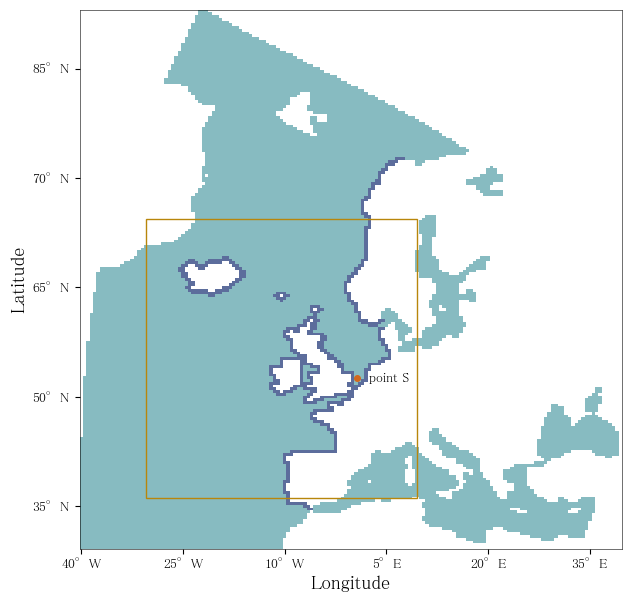

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(7, 7))

im = mesh_mask_study.plot.pcolormesh(
        ax=ax,
        x="x", 
        y="y",
        vmin = 0, 
        vmax = 4, 
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
        add_colorbar=False, 
        )

y = list(range(0,185))
x = list(range(0,160))

rect = mpatches.Rectangle((19, 18), 80, 102, linewidth=1, edgecolor='darkgoldenrod', facecolor='none', label="Cropped area")
rect = ax.add_patch(rect)

ax.set_yticks(np.arange(min(y)+15, max(y), 40))
labels_lat = [item.get_text() for item in ax.get_yticklabels()]
lat_label = ['35°N', '50°N', '65°N', '70°N', '85°N']
ax.set_yticklabels(lat_label, fontsize=10)
ax.set_ylabel('Latitude', fontsize=14)

ax.set_xticks(np.arange(min(x), max(x),30))
labels_lon = [item.get_text() for item in ax.get_xticklabels()]
lon_label = ['40°W', '25°W', '10°W', '5°E', '20°E', '35°E']
ax.set_xticklabels(lon_label, fontsize=10)
ax.set_xlabel('Longitude', fontsize=14)

ax.plot(81.2, 62, "o", color='chocolate', markersize=4)
ax.text(85, 60.5,'point S', fontsize=10, color='black')

for location in ['left','bottom', 'right', 'top']:
    ax.spines[location].set_linewidth(0.4)

pass

plt.savefig('/Users/chiaraciscato/Desktop/GEOMAR/OAEseasonality/out/alkalinityAddition.png')